In [4]:
import pandas as pd
import numpy as np
import seaborn as sns #Graphique map
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('/content/gdrive/My Drive/creditcard.csv' , sep = ';')

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. Exploraty Data analysis

## Objectif : 
- Exploration des données
- Analyser les relations entre les variables
- Réduction de dimention si necessaire, si possible

## Analyse descriptive

### Analyse de forme :

- **variable target :** Class
- **lignes, colonnes :** (284807, 31)
- **types de variables :** 30 float64, 1 int64
- **analyse des valeurs manquantes :** 0 Na

### Analyse de fond :

- **visualisation de la target :**Nous remarquons que les classes sont déséquilibrées. En effet, les données sur les fraudes sont sous-représentées (0,1%)


- **visualisation des features :** Toutes les variables sont anonymes et apparaissent standardisées en dehors du temps et du montant.
    
    Time :
    - max = 172792
    - min = 0
    - median = 84692
    - mean = 94813.86.
    
    
    Amount :
    - max = 25691.16
    - min = 0
    - median = 5.6
    - mean = 88
    

- **visualisation des features / target :** Some variables allows to delimit the two populations (V1 à V4; V9 à V12; V16 à V19)


- **analyse de corrélation linéaire:** Les corrélations entre les variables sont très faibles. Il n'est donc pas possible de réaliser une analyse en composante principale (ACP)

## Analyse descriptive

### Analyse de frome

In [7]:
dataset.shape

(284807, 31)

In [8]:
dataset.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [9]:
dataset.isna().sum(axis = 0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
features = dataset.copy()
del features['Class']
target = dataset.Class

In [11]:
features.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Analyse de fond

#### Visualisation des features

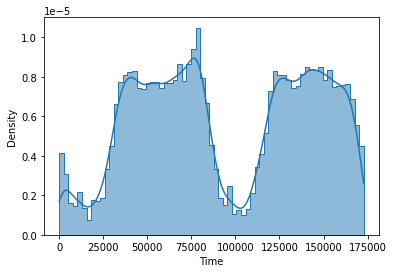

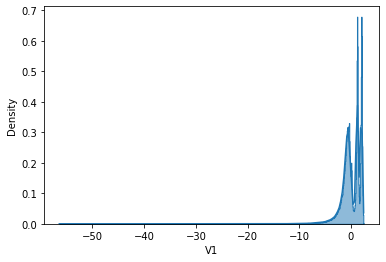

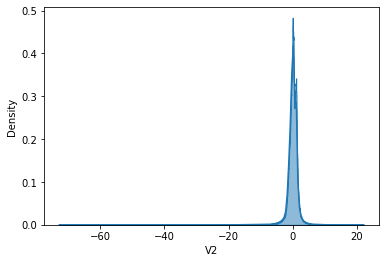

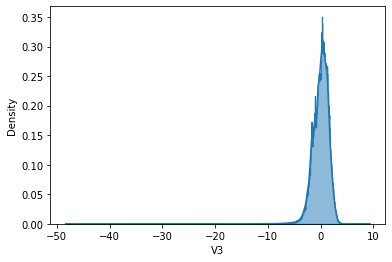

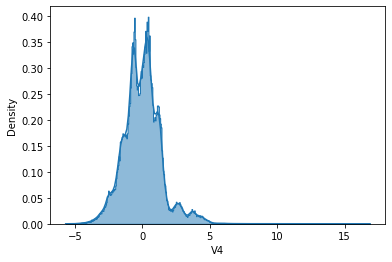

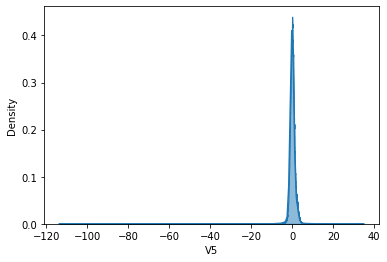

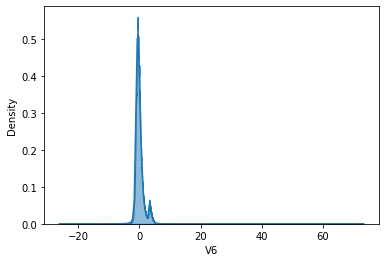

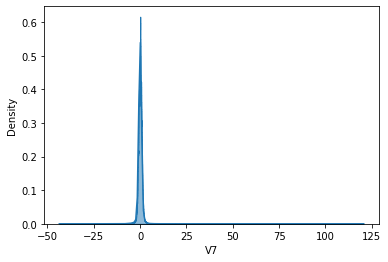

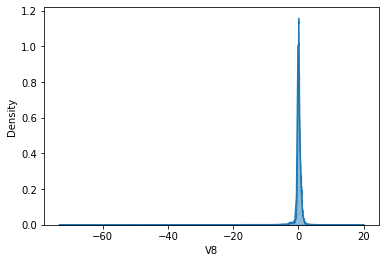

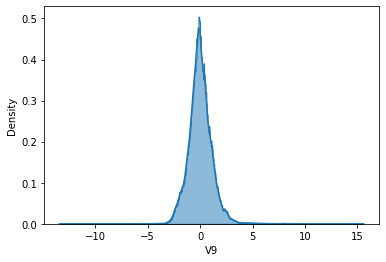

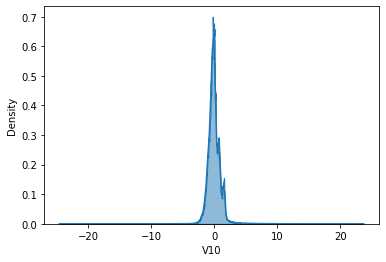

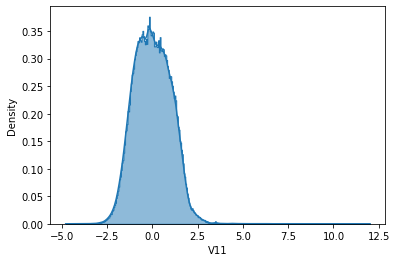

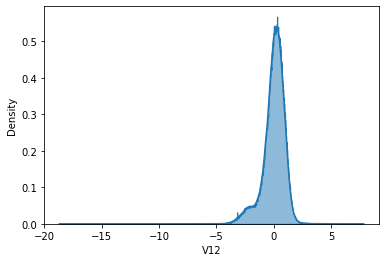

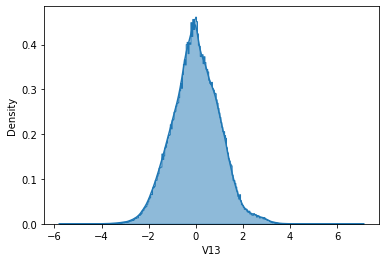

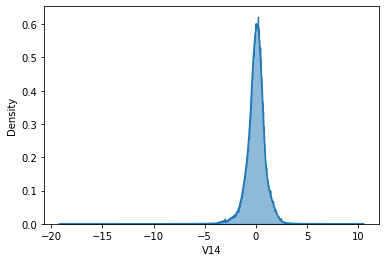

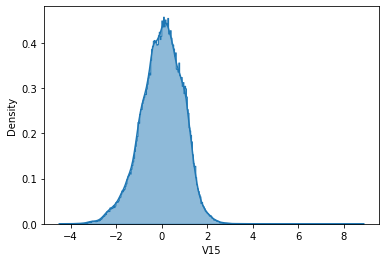

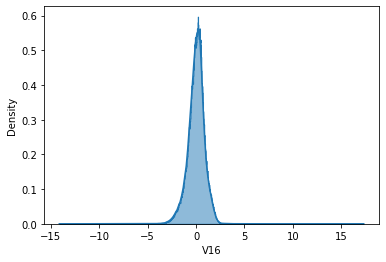

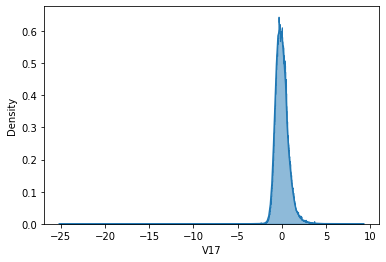

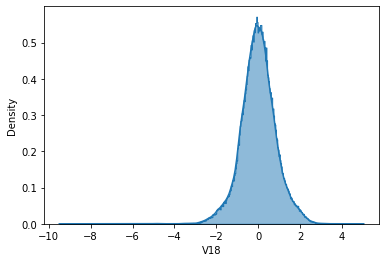

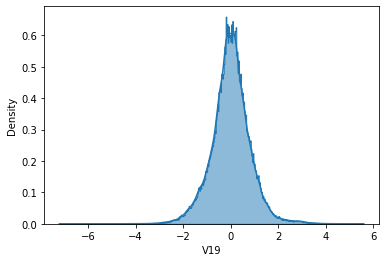

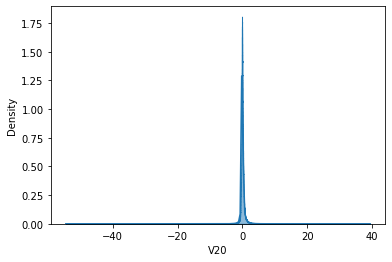

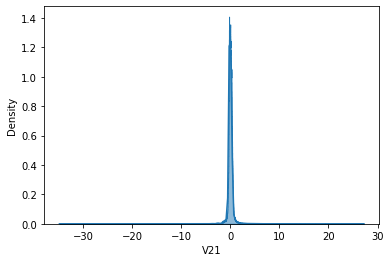

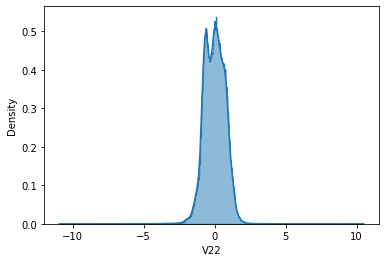

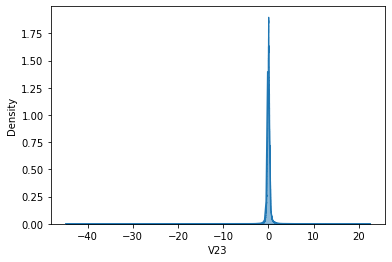

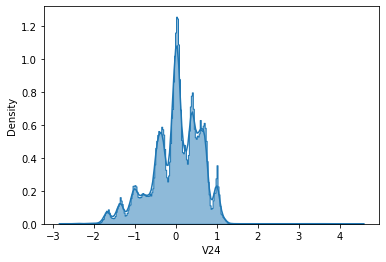

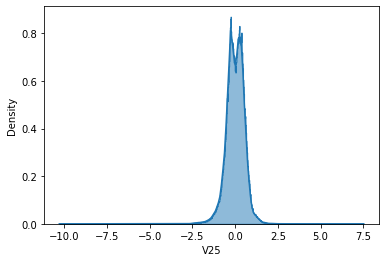

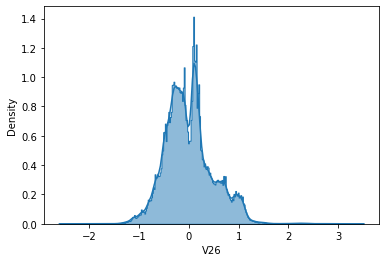

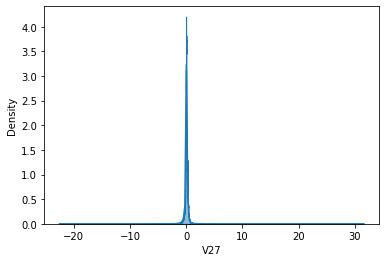

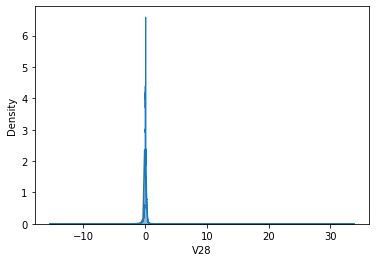

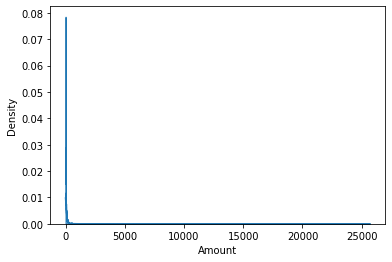

In [ ]:
## Fonction de traçages de plusieurs histogrammes : 14
for col in dataset.select_dtypes('float'):
    sns.histplot(dataset[col], kde=True, stat="density", element="step")
    plt.show()

In [ ]:
dataset.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### features vs target

In [ ]:
frausdter = features[target == 1]
No_frausdter = features[target == 0]

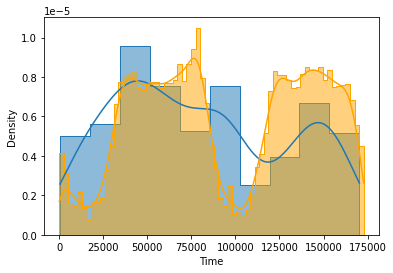

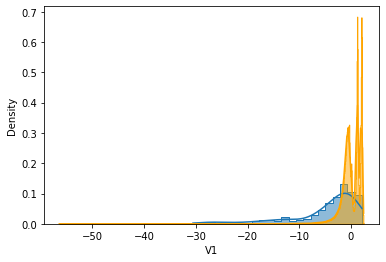

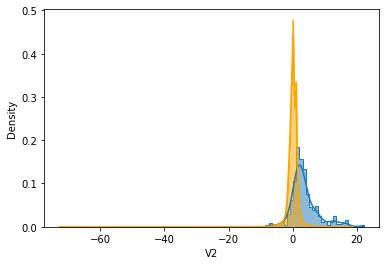

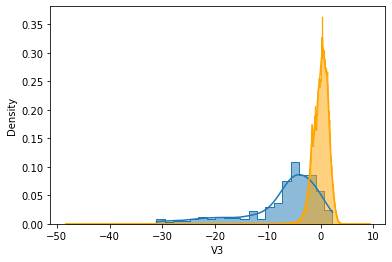

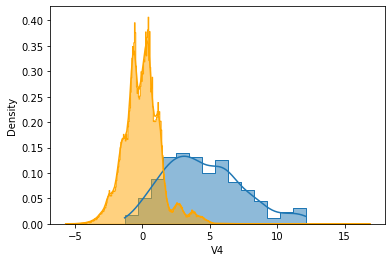

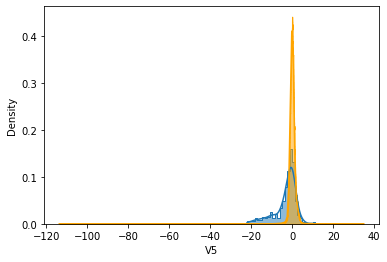

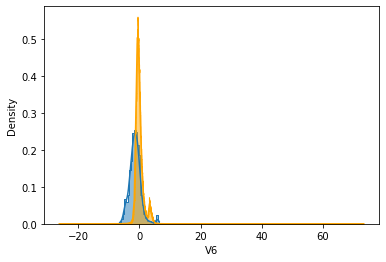

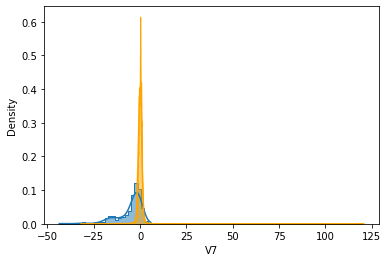

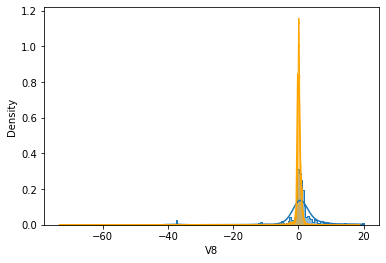

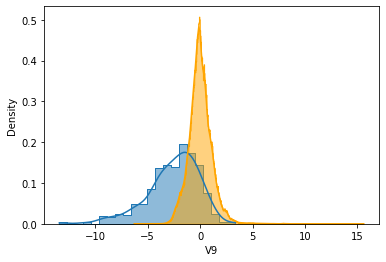

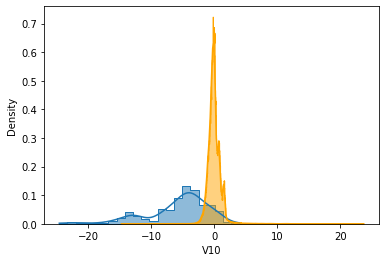

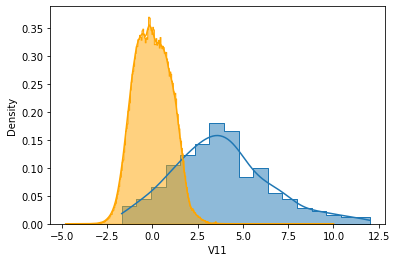

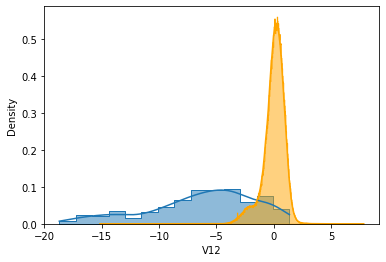

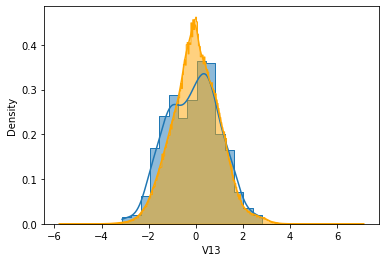

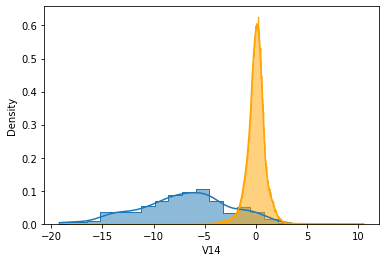

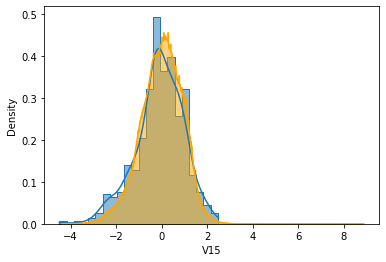

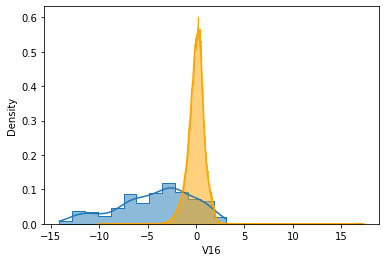

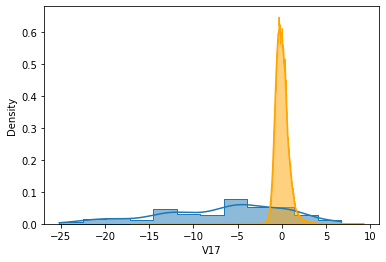

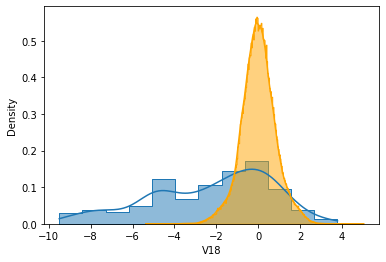

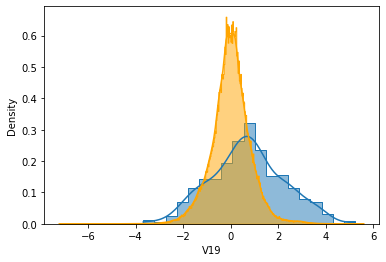

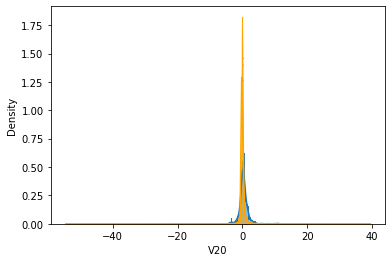

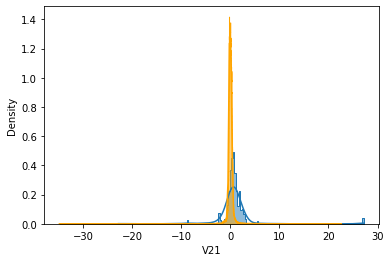

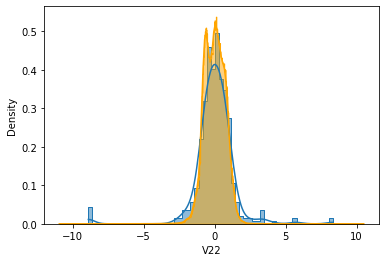

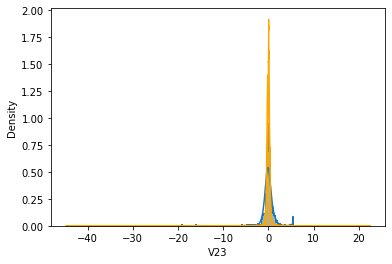

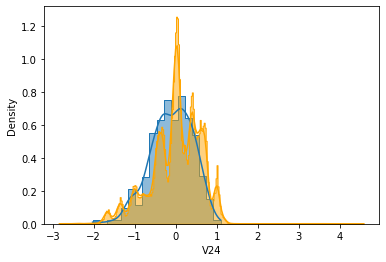

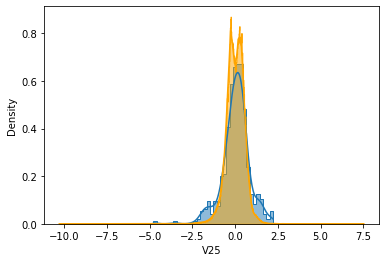

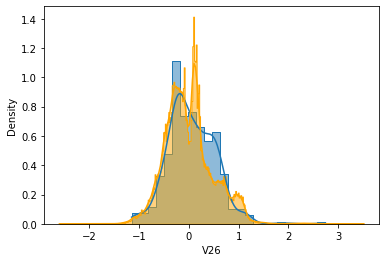

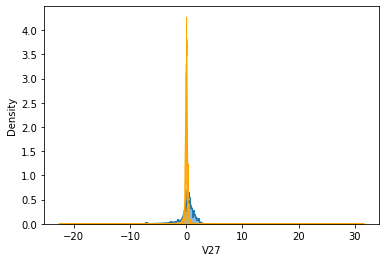

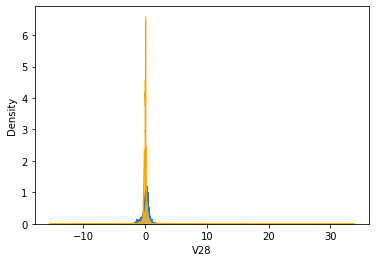

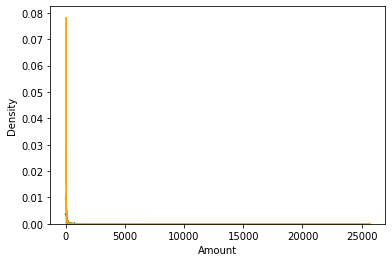

In [ ]:
for col in dataset.select_dtypes('float'):
    sns.histplot(frausdter[col], stat="density", label ='frausdter', element="step", kde=True)
    sns.histplot(No_frausdter[col], stat="density", label = 'No_frausdter',  element="step", kde=True, color = 'orange')
    plt.show()

#### features vs features

All variables are quantitatives, we will apply a PCA if they are correled each other.
The variables aren't correled each other, it isn't necessary to do a PCA on the data.
We will keep all variables.

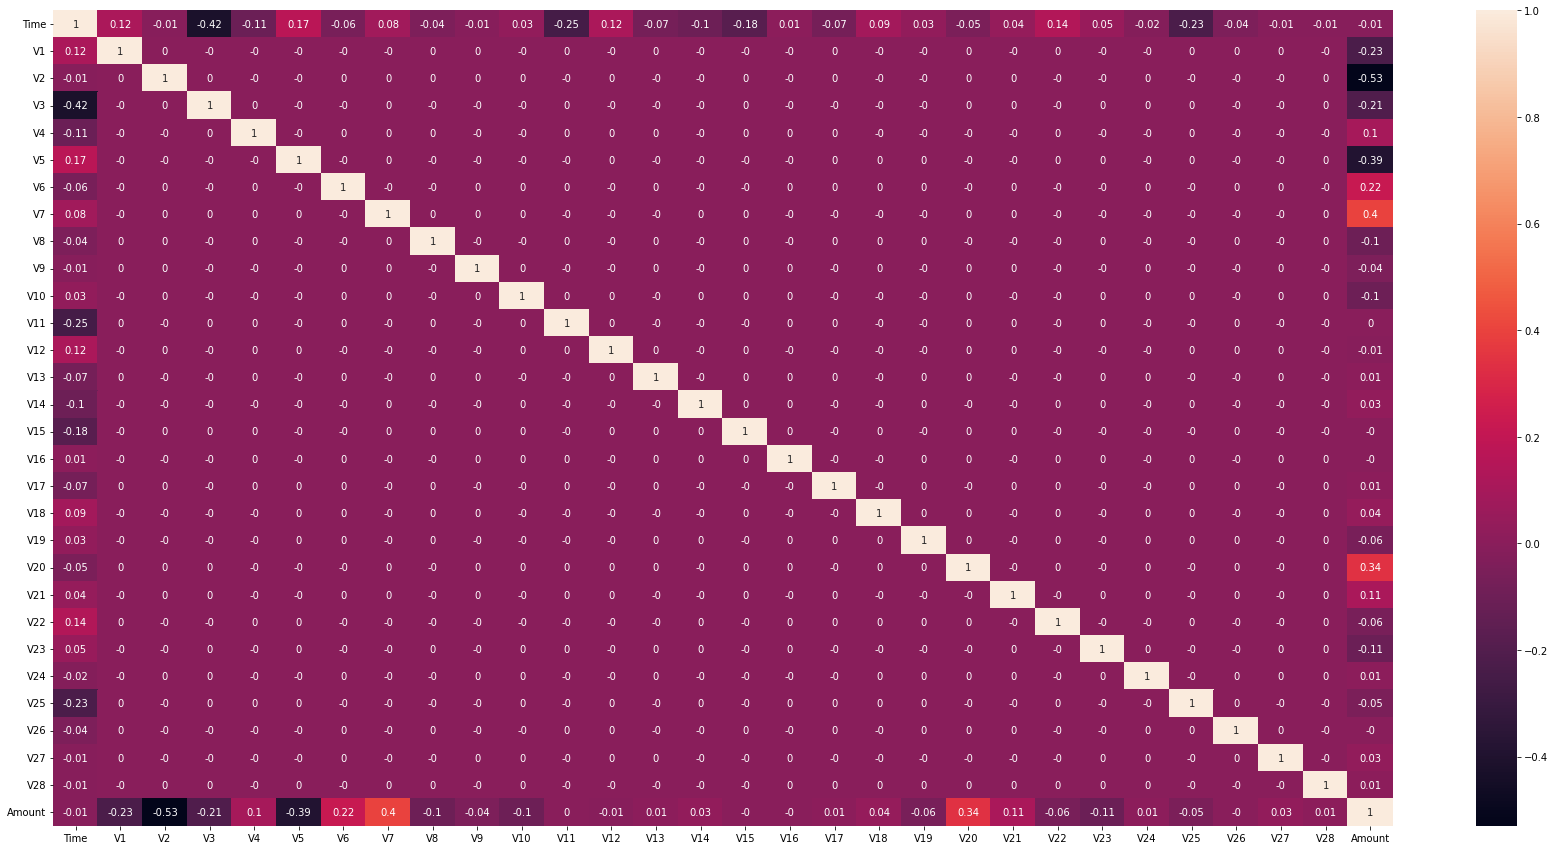

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(round(features.corr(),2), annot=True)
plt.show()

# 2. Data modelisation

## Objectifs : 
- Préparer les données à la modélisation
- Développer une pemière stratégie de modélisation
- Choisir le modèle le plus performant entre plusieurs
- Optmiser les paramètres recall >= 83% et f1_score >=86%


## Preprocessing

- **data_train, data_test :** 80%, 20%
- **Time and Amount :** standardiser ces deux variables (skleran.preprocessing import StandardScaler)

## Modélisation

### Première stratégie
**Arbre de régression :** La courbe du train_score indique un overfiting. Cela peut entaîner des problèmes de généralisation du modèle sur des nouvelles données. Les données étant unbanlanced (déséquilibré), nous utiliserons StratifiedKFold comme méthode de validation croisée. (sklearn.model_selection import StratifiedKFold).

    - recall = 0.8
    - f1_score = 0.77
 
On peut essayer de résoudre ce problème en faisant une sélection de variables. L'analyse descriptive indiquait une différence de distribution entre les fraudeurs et les non fraudeurs. On peut donc baser notre critère de sélection sur les résultats d'un test anova. (skleran.features_selection import SelectKBest, f_classif).

Quelque soit le nombre de variables sélectionnés (graphique 2), le modèle reste en oversfiting. Nous utilisons donc d'autres modèles.

La courbe indique également que les 4 premières sélectionnées donnent de meilleures prformances que l'utilisation de l'ensemble des variables. Dans la suite de notre modélisation nous utlisérons que les 04 variables sélectionnées. En plus de donner de meilleures performances, cela permettra de réduire le d'éxécution du code.

### Seconde stratégie
**Random Forest :** La courbe du train_score indique un overfitting également. Les résultats obtenus sur les données de test sont les suivants :

    - recall = 0.78
    - f1_score = 0.84

L'analyse du graphqie nous montre que ce modèle ne résoud pas le problème d'overfiting. Il donne cependant de meilleurs résultats (en terme de **f1_score**) que le modèle **Arbre de décision**.

### comparaison de plusieurs modèles
**XGBoost :**

    - recall = 0.78
    - f1_score = 0.83

**AdaBoost :**

    - recall = 0.66
    - f1_score = 0.75

**SVC :**

    - recall = 0.79
    - f1_score = 0.86

**KNeighbors :**

    - recall = 0.81
    - f1_score = 0.86

Après l'analyse des graphiques, les modèles XGBoost et KNeighbors semblent être les meilleurs. (Pas d'overfiting, bons résultats).

### Optimisation des pamètres des modèles

**KNeighbors :** Un nombre de voisins plus élevé pourrait permettre d'obtenir de meilleurs résultats. Aussi il serait intéréssant d'affecter un poids aux voisins proportionnellement à la distance qui les sépare du point. Cela permettra de donner plus d'impoortances aux voisins les plus proches. Nous essayerons plusiurs valeurs différentes de ces 2 paramètres et garderons ceux pour lesquels nous obtenons les meilleurs résultats.
Nous obtenons les valeurs suivantes :

    - n_neighbors = 7
    - weights = distance
  
Avec ces valeurs de paramètres nous avons les scores suivants :
    
    - recall = 0.82
    - f1_score = 0.88

L'analyse du graphique .. l'amlélioration du recall en bougeant la valeur du threshold entraînement une très grande dégradation que la précision (par ricoché de la qualité de modèle).
Cependant nous pouvons améliorer la qualité générale du modèle (f1_score) avec threshold = 0.32 tout tout en gardant à peu prêt constante la valeur du recall. 
On obtient une amélioration du recall de 0.02 sans dégrader la performance globale du modèle soit :

    - recall = 0.82
    - f1_score = 0.88

**XGBoost :** Nous décidons d'explorer l'espace de 3 pramètres dans ce modèle. Il s'agit de *learning_rate*, *max_depth* et *n_estimators*.
Les meilleurs valeurs de paramètre son les suivantes :

    - learning_rate : 0.02
    - max_depth : 5
    - n_estimators : 100

Avec ces valeurs de paramètres nous avons les scores suivants :
    
    - recall = 0.80
    - f1_score = 0.84

Dans ce modèle, en analysant le graphique threshold, il serait difficile d'améliorer le recall sans dégrader la précision.



## Preprocessing

### Train_Test, standardisation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
data_train, data_test = train_test_split(dataset, train_size = 0.8, random_state = 0)

In [14]:
data_name = {'train' : data_train, 
             'test' : data_test}
for name, data in data_name.items() :
    print(f'{name} : {round((data.shape[0]/dataset.shape[0])*100, 3)}%')
    print(data.Class.value_counts(normalize = True))
    print('---------------------------------------------')

train : 80.0%
0    0.998284
1    0.001716
Name: Class, dtype: float64
---------------------------------------------
test : 20.0%
0    0.998227
1    0.001773
Name: Class, dtype: float64
---------------------------------------------


In [15]:
def preprocessing(dataset):
    scaler = StandardScaler()
    data = dataset.copy()
    data.Time = scaler.fit_transform(np.array(dataset.Time).reshape(dataset.Time.shape[0],1))
    data.Amount = scaler.fit_transform(np.array(dataset.Amount).reshape(dataset.Time.shape[0],1))
    X = data.drop('Class', axis = 1)
    y = data.Class
    return X, y

In [16]:
X_train, y_train = preprocessing(data_train)
X_test, y_test = preprocessing(data_test)

In [17]:
X_train.Amount.describe()

count    2.278450e+05
mean     4.258263e-17
std      1.000002e+00
min     -3.573262e-01
25%     -3.343861e-01
50%     -2.686298e-01
75%     -4.446995e-02
max      7.889097e+01
Name: Amount, dtype: float64

In [18]:
X_train.Time.describe()

count    2.278450e+05
mean    -1.429975e-16
std      1.000002e+00
min     -1.996443e+00
25%     -8.553628e-01
50%     -2.125288e-01
75%      9.369305e-01
max      1.641237e+00
Name: Time, dtype: float64

# Modélisation

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import learning_curve, cross_val_score, validation_curve, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import parallel_backend, register_parallel_backend
from sklearn.pipeline import make_pipeline

In [22]:
cv = StratifiedKFold(4)

## Procédure d'évaluation

In [23]:
def evaluation(model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = cv, scoring = 'f1',
                                                    train_sizes = np.linspace(0.1, 1, 10))
    
        
    
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend()

## Arbre de décision

[[56833    28]
 [   20    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.74      0.80      0.77       101

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



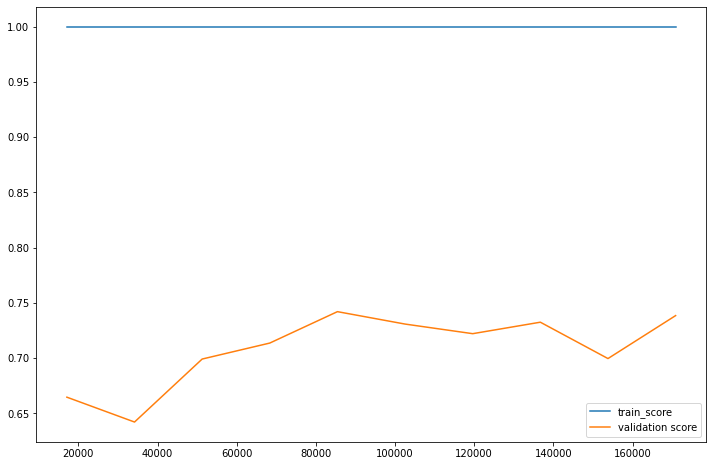

In [ ]:
Tree_model = make_pipeline(DecisionTreeClassifier(random_state = 0))
evaluation(Tree_model)

In [ ]:
Tree_model_2 = make_pipeline(SelectKBest(f_classif, k = 1), Tree_model)
Tree_model_2

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=1,
                             score_func=<function f_classif at 0x7fb65976b950>)),
                ('pipeline',
                 Pipeline(memory=None,
                          steps=[('decisiontreeclassifier',
                                  DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
         

In [ ]:
k = list(np.arange(1, 31))
train_score, val_score = validation_curve(Tree_model_2, X_train, y_train, param_name = 'selectkbest__k', 
                                          param_range = k, cv = cv, scoring = 'f1')

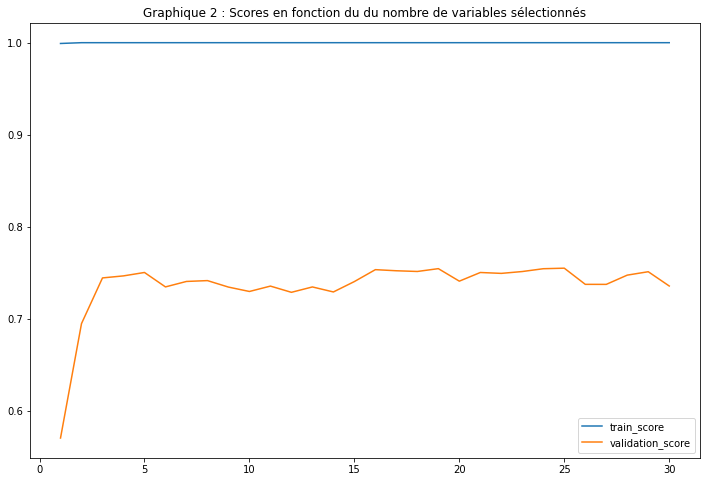

In [ ]:
plt.figure(figsize= (12,8))
plt.plot(k, train_score.mean(axis = 1), label = 'train_score')
plt.plot(k, val_score.mean(axis = 1), label = 'validation_score')
plt.legend()
plt.title('Graphique 2 : Scores en fonction du du nombre de variables sélectionnés')
plt.show()

## Random Forest

In [ ]:
model_RDF = make_pipeline(SelectKBest(f_classif, k = 4), RandomForestClassifier(random_state = 0))

[[56854     7]
 [   22    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



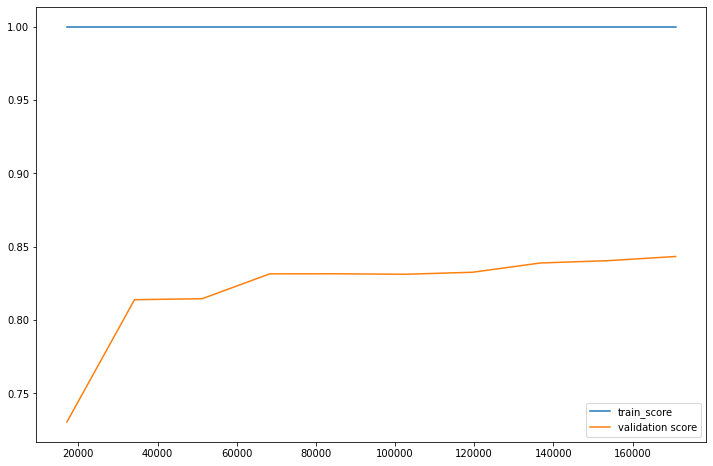

In [ ]:
evaluation(model_RDF)

# Optimisation du modèle

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [25]:
AdaBoost = make_pipeline(SelectKBest(f_classif, k = 4), AdaBoostClassifier(random_state = 0))
SVC_model = make_pipeline(SelectKBest(f_classif, k = 4), SVC(random_state = 0, gamma='auto'))
KNeighbors = make_pipeline(SelectKBest(f_classif, k = 4), KNeighborsClassifier())
XGB = make_pipeline(SelectKBest(f_classif, k = 4), XGBClassifier())

In [26]:
list_of_models = {
    "XGB" : XGB,
    "AdaBoost" : AdaBoost,  
    "SVC_model" : SVC_model,
    "KNeighbors_model" : KNeighbors
}

XGB
[[56851    10]
 [   22    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.78      0.83       101

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AdaBoost
[[56850    11]
 [   34    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.66      0.75       101

    accuracy                           1.00     56962
   macro avg       0.93      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

SVC_model
[[56856     5]
 [   21    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.79      0.86       101

    accuracy                           1.00     56962
   macro avg

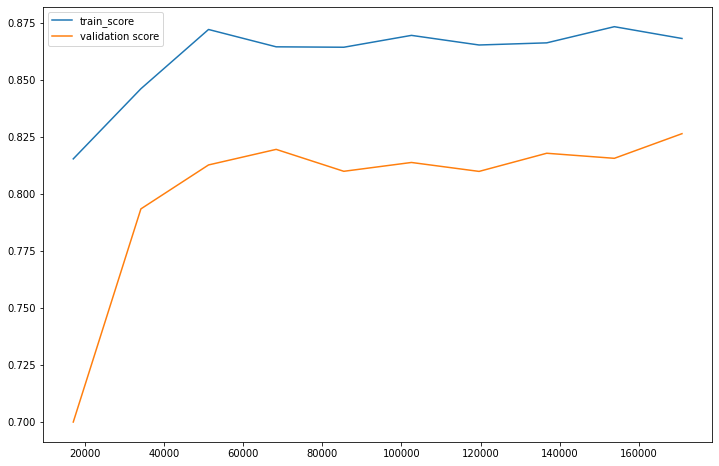

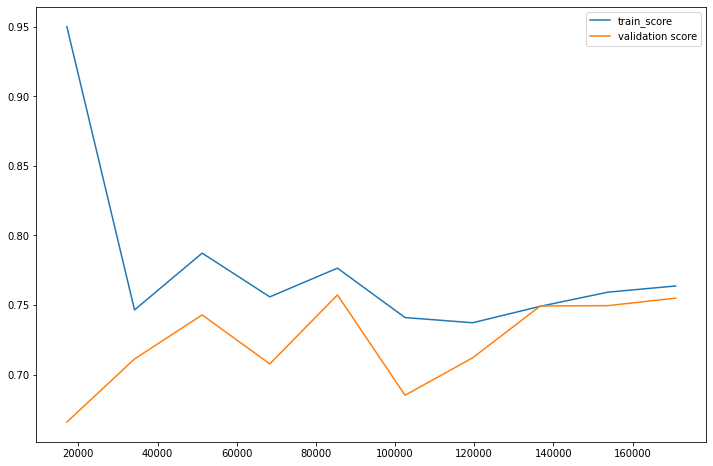

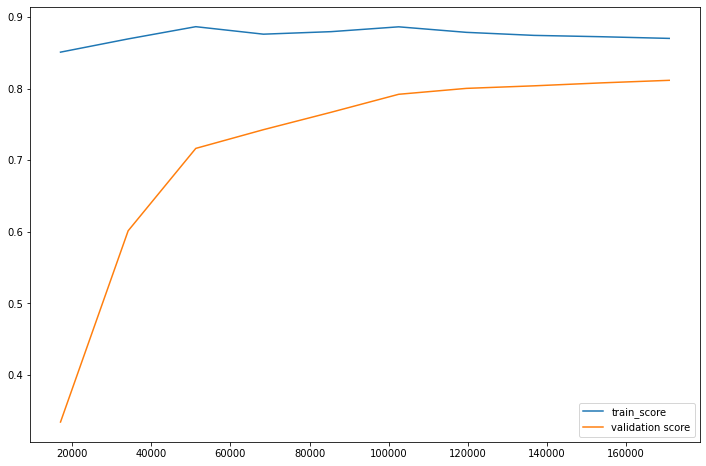

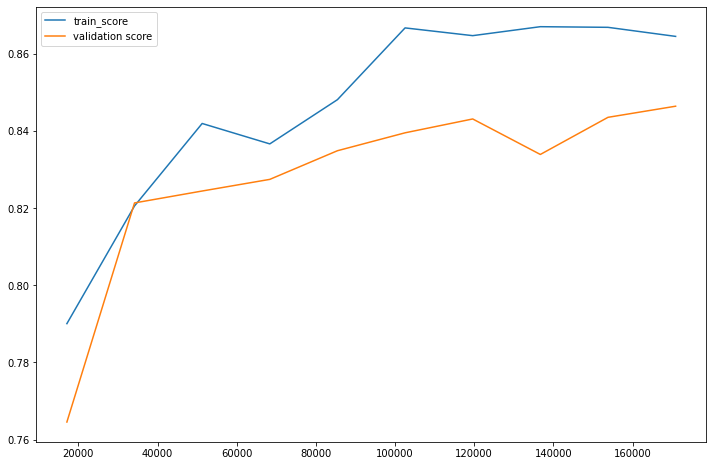

In [ ]:
for name, model in list_of_models.items() :
    print(name)
    evaluation(model)

# Optimisation

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [28]:
KNeighbors = make_pipeline(SelectKBest(f_classif, k = 4), KNeighborsClassifier(n_neighbors = 5))
KNeighbors

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function f_classif at 0x7f5fe2921d40>)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [29]:
hyper_params_KNN = {
    'kneighborsclassifier__n_neighbors' : [3, 5, 7, 13],
    'kneighborsclassifier__weights' : ['distance', 'uniform']
}

In [60]:
grid_KNN = GridSearchCV(KNeighbors, hyper_params_KNN, scoring = 'recall', cv = cv)

In [61]:
grid_KNN.fit(X_train, y_train) 
print(grid_KNN.best_params_)

{'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'distance'}


In [62]:
y_pred_KNN  = grid_KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.82      0.88       101

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
from sklearn import metrics

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, grid_KNN.predict_proba(X_test)[:, 1])

In [65]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

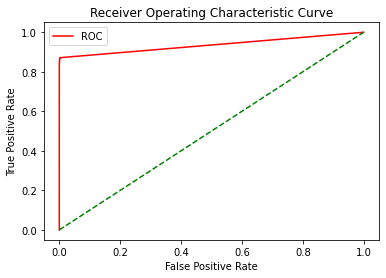

In [66]:
plot_roc_curve(fpr, tpr)

In [69]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, grid_KNN.predict_proba(X_test)[:, 1])
f1 =  2 * (precision*recall / (precision + recall))

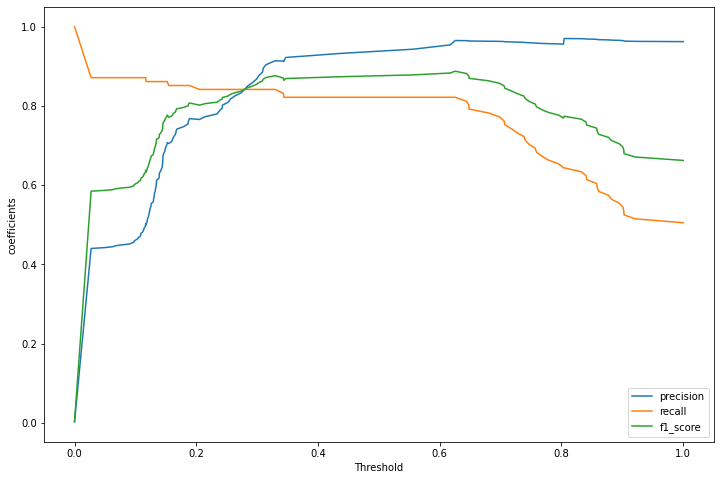

In [70]:
plt.figure(figsize = (12, 8))
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.plot(threshold, f1[:-1], label = 'f1_score')
plt.xlabel('Threshold')
plt.ylabel('coefficients')
plt.legend()

In [30]:
XGB = make_pipeline(SelectKBest(f_classif, k = 4), XGBClassifier())
XGB

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function f_classif at 0x7f5fe2921d40>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [81]:
hyper_params_XGB = {
    'xgbclassifier__max_depth' : [5, 7],
    'xgbclassifier__learning_rate' : [0.03, 0.01, 0.02],
    'xgbclassifier__n_estimators' : [100, 200],
}

In [82]:
grid_XGB = GridSearchCV(XGB, hyper_params_XGB, scoring = 'recall', cv = cv)

In [83]:
grid_XGB.fit(X_train, y_train) 
print(grid_XGB.best_params_)

{'xgbclassifier__learning_rate': 0.02, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 100}


In [84]:
y_pred_XGB  = grid_XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.80      0.84       101

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, grid_XGB.predict_proba(X_test)[:, 1])

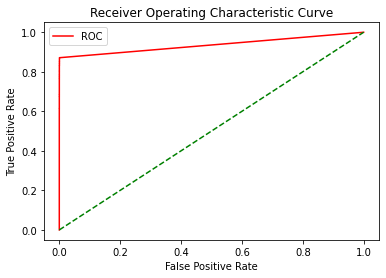

In [86]:
plot_roc_curve(fpr, tpr)

## Precision Recall Curve

In [87]:
precision, recall, threshold_2 = metrics.precision_recall_curve(y_test, grid_XGB.predict_proba(X_test)[:, 1])
f1 =  2 * (precision*recall / (precision + recall))

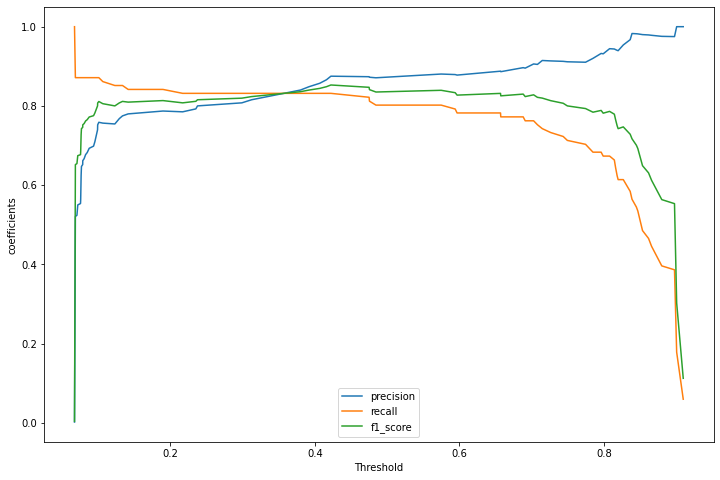

In [88]:
plt.figure(figsize = (12, 8))
plt.plot(threshold_2, precision[:-1], label = 'precision')
plt.plot(threshold_2, recall[:-1], label = 'recall')
plt.plot(threshold_2, f1[:-1], label = 'f1_score')
plt.xlabel('Threshold')
plt.ylabel('coefficients')
plt.legend()

In [95]:
def model_final(model, X, threshold) :
  return model.predict_proba(X)[:, 1] > threshold

In [96]:
for i in np.arange(0.3, 0.4, 0.01):
  y_pred_final = model_final(grid_KNN, X_test, i)
  print('threshold = ', i)
  print(classification_report(y_test, y_pred_final))

threshold =  0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.84      0.86       101

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

threshold =  0.31
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.90      0.84      0.87       101

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

threshold =  0.32
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.84      0.88       101

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.